In [13]:
import fitsio as ft
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import sys
sys.path.append('/users/PHS0336/medirz90/github/LSSutils')
from lssutils.utils import hpix2radec, maps_dr9

In [14]:
maps_dr9

['EBV',
 'STARDENS',
 'GALDEPTH_GMAG_EBV',
 'GALDEPTH_RMAG_EBV',
 'GALDEPTH_ZMAG_EBV',
 'PSFDEPTH_W1MAG_EBV',
 'PSFSIZE_G',
 'PSFSIZE_R',
 'PSFSIZE_Z']

In [2]:
datapath = '/fs/ess/PHS0336' # on OSC
region = 'bmzls'             # bmzls:BASS+MzLS, ndecalsc: DECaLS North, sdecalsc: DECaLS South, desic: full DESI
data = ft.read(f'{datapath}/data/jaylrgpca/nlrg_features_{region}_256.fits')

In [3]:
data.dtype # features: imaging properties, label: galaxy counts, hpix: HEALPix pixel id (ring, nside=256)

dtype([('features', '>f8', (9,)), ('label', '>f8'), ('fracgood', '>f8'), ('hpix', '>i8')])

In [4]:
ra,dec = hpix2radec(256, data['hpix'])

Text(0, 0.5, 'DEC')

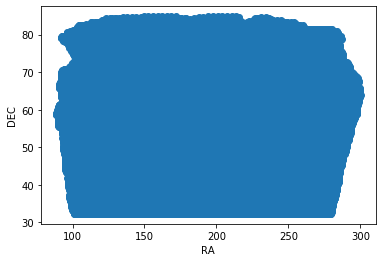

In [5]:
plt.scatter(ra, dec)
plt.xlabel('RA')
plt.ylabel('DEC')

In [6]:
cf = np.corrcoef(data['features'], rowvar=False) # make sure rowvar=False
cf.shape

(9, 9)

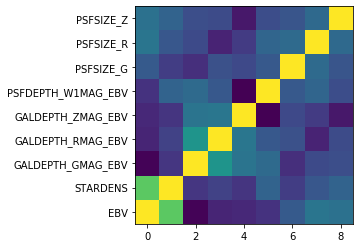

In [16]:
plt.imshow(cf, origin='lower')
_ = plt.yticks(np.arange(9), maps_dr9)

In [17]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=9)

In [30]:
x = data['features']

In [31]:
xt = pca.fit_transform(x)

In [32]:
cf_t = np.corrcoef(xt, rowvar=False)

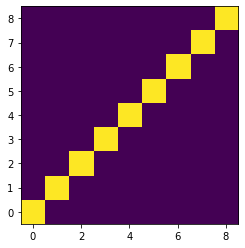

In [33]:
plt.imshow(cf_t, origin='lower')

In [34]:
pca.explained_variance_

array([5.09090685e+05, 5.83830040e-02, 4.44011202e-02, 3.27277707e-02,
       2.62260749e-02, 2.00565376e-02, 1.12296502e-02, 9.84262249e-03,
       4.23802633e-04])

In [45]:
x.shape

(98027, 9)

In [47]:
pca.components_.shape

(9, 9)

In [48]:
x.dot(pca.components_)

array([[ 2.63328012e+01,  1.28645675e-01, -1.42300924e+02, ...,
         4.57870352e+02,  7.08373082e+02,  1.10889228e+02],
       [ 3.38629153e+01,  1.42177349e-01, -1.80322180e+02, ...,
         5.96544466e+02,  9.37056844e+02,  1.42572669e+02],
       [ 2.46378053e+01,  1.43816108e-01, -1.32142148e+02, ...,
         4.20459730e+02,  6.47591944e+02,  1.02333666e+02],
       ...,
       [ 1.09728097e+02,  8.54086059e-02, -5.63614616e+02, ...,
         1.99157951e+03,  3.24043672e+03,  4.62704120e+02],
       [ 9.81998043e+01,  7.12857979e-02, -5.05523161e+02, ...,
         1.77875475e+03,  2.88982195e+03,  4.13878285e+02],
       [ 1.13465738e+02,  8.63667963e-02, -5.84167162e+02, ...,
         2.06473067e+03,  3.36312452e+03,  4.79220906e+02]])

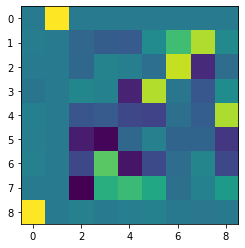

In [58]:
plt.imshow(pca.components_)

In [52]:
x

array([[1.29611596e-01, 9.15055176e+02, 2.34855309e+01, ...,
        1.79487324e+00, 2.17911959e+00, 1.22615516e+00],
       [1.43033177e-01, 1.20100989e+03, 2.36261253e+01, ...,
        1.91033542e+00, 2.15306735e+00, 1.23995674e+00],
       [1.44845113e-01, 8.38800598e+02, 2.29834461e+01, ...,
        2.13725019e+00, 2.11030626e+00, 1.52904129e+00],
       ...,
       [8.51117149e-02, 4.07962109e+03, 2.38312416e+01, ...,
        2.40052199e+00, 2.47396922e+00, 1.29977417e+00],
       [7.11834878e-02, 3.64115698e+03, 2.34857960e+01, ...,
        3.03975916e+00, 2.52605581e+00, 1.27793860e+00],
       [8.60183239e-02, 4.23213037e+03, 2.30137138e+01, ...,
        3.32859850e+00, 2.57167172e+00, 9.77030218e-01]])